In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)
tf.test.is_gpu_available()
plt.style.use('seaborn')

2.6.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2021-11-03 14:11:24.624278: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


False

In [2]:
# Import Dataset
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()
print(f"Train: X: {trainX.shape}    y: {trainY.shape}")
print(f"Test: X: {testX.shape}    y: {testY.shape}")

Train: X: (60000, 28, 28)    y: (60000,)
Test: X: (10000, 28, 28)    y: (10000,)


<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

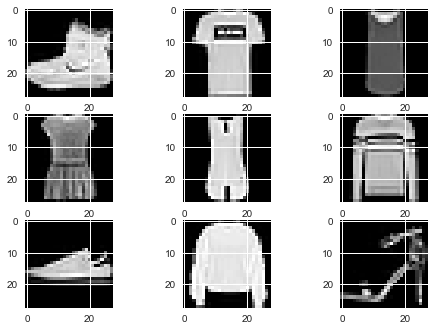

In [3]:
# Plot out first 10 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap("gray"))
plt.show()

In [4]:
# Reshape images
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
trainY = tf.keras.utils.to_categorical(trainY) # One-hot encoding
testX = testX.reshape((testX.shape[0], 28, 28, 1))
testY = tf.keras.utils.to_categorical(testY) # One-hot encoding

In [5]:

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255 , input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    metrics=['accuracy'],
)


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

In [7]:
def plotLossAccGraph(result):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(result.history['loss'], label='Training Loss')
    ax1.plot(result.history['val_loss'], label='Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    # ax1.set_ylim(bottom=0.0, top=0.6)
    ax1.legend()

    ax2.plot(result.history['accuracy'], label='Training Accuracy')
    ax2.plot(result.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    # ax2.set_ylim(bottom=0.85, top=1.0)
    ax2.legend()

    plt.show()


In [8]:

callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)
epochs = 20
batch = 256

def train(model, epochs, batch):
    result = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch)
    return result



2021-11-03 14:11:43.327223: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
235/235 [==============================] - 16s 64ms/step - loss: 0.7098 - accuracy: 0.7533 - val_loss: 0.5141 - val_accuracy: 0.8149
Epoch 2/20
235/235 [==============================] - 15s 64ms/step - loss: 0.4495 - accuracy: 0.8401 - val_loss: 0.4418 - val_accuracy: 0.8408
Epoch 3/20
235/235 [==============================] - 16s 69ms/step - loss: 0.3984 - accuracy: 0.8587 - val_loss: 0.4189 - val_accuracy: 0.8458
Epoch 4/20
235/235 [==============================] - 15s 64ms/step - loss: 0.3656 - accuracy: 0.8710 - val_loss: 0.3998 - val_accuracy: 0.8546
Epoch 5/20
235/235 [==============================] - 15s 63ms/step - loss: 0.3424 - accuracy: 0.8790 - val_loss: 0.3686 - val_accuracy: 0.8682
Epoch 6/20
235/235 [==============================] - 14s 62ms/step - loss: 0.3255 - accuracy: 0.8850 - val_loss: 0.3708 - val_accuracy: 0.8651
Epoch 7/20
235/235 [==============================] - 16s 68ms/step - loss: 0.3111 - accuracy: 0.8888 - val_loss: 0.3383 - val_accuracy:

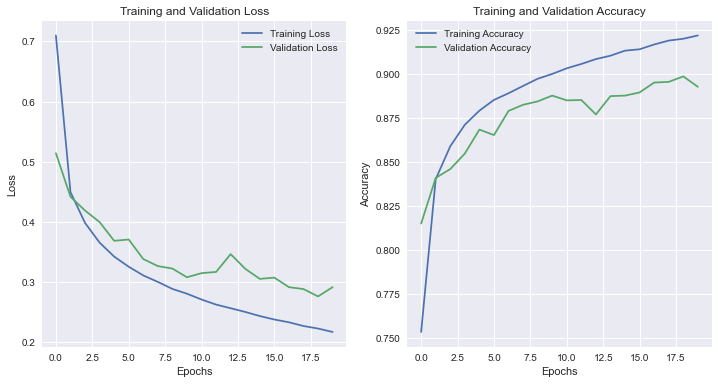

In [9]:
result = train(model, epochs, batch)
plotLossAccGraph(result)


In [11]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),

    # tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)


In [12]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [13]:
result1 = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 21s 88ms/step - loss: 0.7230 - accuracy: 0.7521 - val_loss: 0.4892 - val_accuracy: 0.8224
Epoch 2/10
235/235 [==============================] - 18s 76ms/step - loss: 0.4358 - accuracy: 0.8440 - val_loss: 0.4315 - val_accuracy: 0.8426
Epoch 3/10
235/235 [==============================] - 17s 70ms/step - loss: 0.3795 - accuracy: 0.8652 - val_loss: 0.3852 - val_accuracy: 0.8629
Epoch 4/10
235/235 [==============================] - 16s 66ms/step - loss: 0.3487 - accuracy: 0.8773 - val_loss: 0.3583 - val_accuracy: 0.8727
Epoch 5/10
235/235 [==============================] - 16s 68ms/step - loss: 0.3256 - accuracy: 0.8846 - val_loss: 0.3472 - val_accuracy: 0.8761
Epoch 6/10
235/235 [==============================] - 21s 87ms/step - loss: 0.3048 - accuracy: 0.8918 - val_loss: 0.3351 - val_accuracy: 0.8807
Epoch 7/10
235/235 [==============================] - 18s 77ms/step - loss: 0.2907 - accuracy: 0.8954 - val_loss: 0.3232 - val_accuracy: